# My Plotting Tool for the Corona Virus Data
Source of the data: [Johns Hopkins University Center for Systems Science and Engineering](https://github.com/CSSEGISandData/COVID-19)

In [10]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import csv

from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

matplotlib.rcParams.update({'font.size': 13})

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
formatter = DateFormatter('%m/%d')

Let's first load the data

In [42]:
def readMyFile(filename):
    dates = []
    data = {}
    ddata={}
    with open(filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for i,row in enumerate(csvReader):
            if i==0: 
                
                dates = np.array([datetime.strptime(date, '%m/%d/%y') for date in row[4:] ])
            else:
                county = row[1]
                if county=='Mainland China': county='China'
                rawdata = row[4:]
                number = np.array([int(n) for n in rawdata])
                dnumber = np.array([0]+[number[i]-number[i-1] for i in range(1,len(number))])
                if county in data:
                    data[county] += number
                    ddata[county] += dnumber
                else:
                    data[county] = number
                    ddata[county] = dnumber
            
    return dates, data, ddata


dates, confirmed, dconfirmed = readMyFile('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
dates, death    , ddeath     = readMyFile('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
dates, recovered, drecovered = readMyFile('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

datamin=dates[0]
datamax=dates[-1]

Define the plotting function

In [38]:
def do_plot(counties,datemin=None,datemax=None):
    
    if datemin is None: usedatemin=datamin
    else: usedatemin=datetime.strptime(datemin, '%m/%d/%y')
    if datemax is None: usedatemax=datamax
    else: usedatemax=datetime.strptime(datemax, '%m/%d/%y')
        
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

    for country in countries:
        ax1.plot_date(dates, confirmed[country],ls="solid",label=country)  
        ax2.plot_date(dates, dconfirmed[country],ls="solid",label=country)  

    ax1.set_xlim(usedatemin,usedatemax)
    ax1.set_xlabel(r'date')
    ax1.set_ylabel(r'confirmed cases')
    ax1.xaxis.set_major_formatter(formatter)
    ax1.xaxis.set_minor_locator(days)
    ax1.set_yscale("log")
    ax1.legend(loc="upper left",frameon=False,)
    ax1.grid(True)

    ax2.set_xlim(usedatemin,usedatemax)
    ax2.set_xlabel(r'date')
    ax2.set_ylabel(r'confirmed cases')
    ax2.xaxis.set_major_formatter(formatter)
    ax2.xaxis.set_minor_locator(days)
    ax2.set_yscale("log")
    ax2.legend(loc="upper left",frameon=False,)
    ax2.grid(True)

    plt.show() 

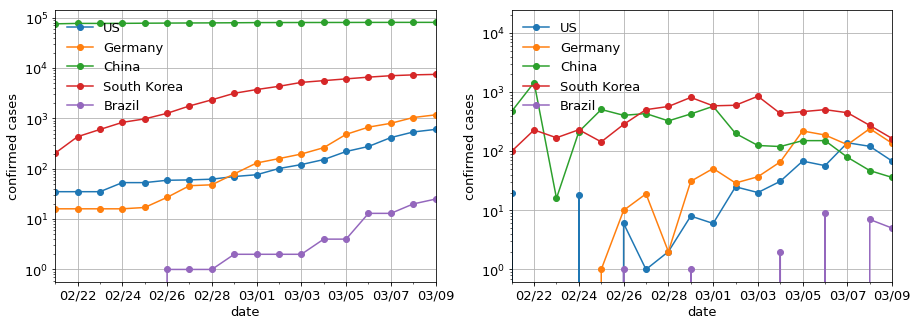

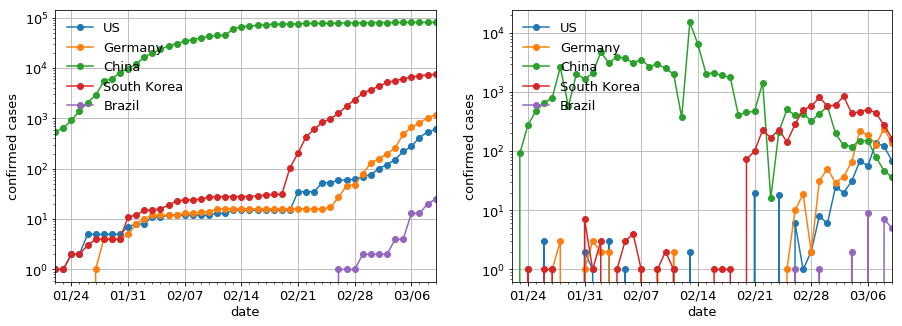

In [39]:
countries = ['US','Germany','China','South Korea','Brazil']
do_plot(countries,datemin='2/21/20')
do_plot(countries)